# Author:Shehu Alaba Rasheed

## Data Science and Business analytics intern @ The Sparks Foundation

# The Sparks Foundation 

## Task 2

## Prediction Using Unsupervised ML

![Iris Image](https://jooinn.com/images/blue-iris-flower-9.jpg)

This project involves iris data set, A supervised machine learning model will be trained that groups the iris dataset into clusters and it will be visualised 

**[Data Source](https://bit.ly/3kXTdox)**

**Data Description:**
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [3]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='colorblind')
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
raw_data = pd.read_csv('Iris.csv')
print(raw_data.head())
print('\n')
print(raw_data.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


**Observation**
* There are no missing values in the dataset
* The species is already given, it must be dropped since we are trying a supervised model
* The species can be used to evaluate the model though
* The Id will be used as the index
* The data will be splited into train and test set before any exploratory data analysis is done on it

In [5]:
train, test = train_test_split(raw_data, test_size=0.2, shuffle=True, random_state=123)

In [6]:
# Dropping the Species in both the train and test set
train_set = train.drop('Species', axis=1)
train_label = train['Species']
test_set = test.drop('Species', axis=1)
test_label = test['Species']

In [7]:
# Set Id as the Index
train_set.set_index('Id', inplace=True)
test_set.set_index('Id', inplace=True)

# Exploratory Data analysis

In [8]:
train_set.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,120.000000,120.000000,120.000000,120.000000
mean,5.869167,3.040833,3.820833,1.223333
std,0.812900,0.440492,1.728841,0.742552
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


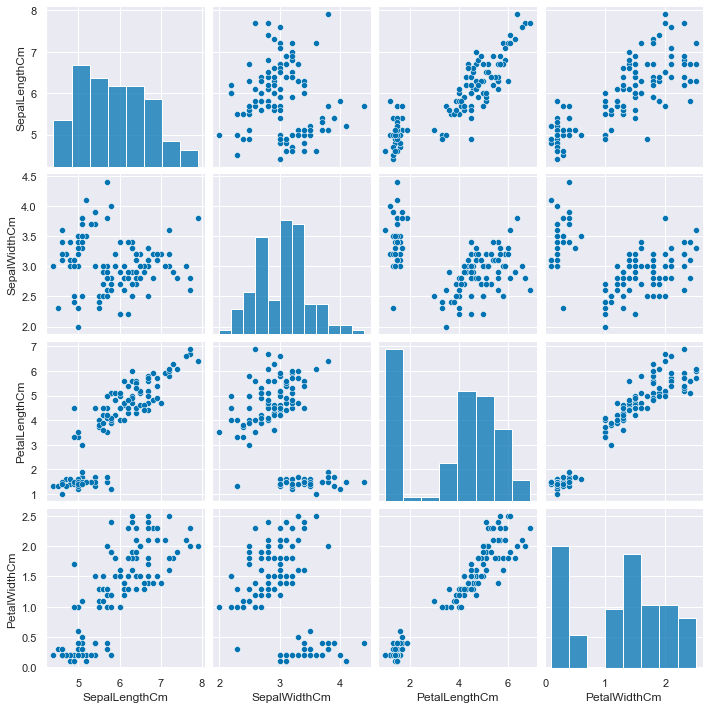

In [9]:
# Relationship of Variables
sns.pairplot(train_set)
plt.show()

**Observation**
* Most of the data are moderately normally distributed
* PetalLengthCm and PetalWidthCm are highly positively correlated, i.e as high PetalLength is associated to a high PetalWidthCm
* Judging from the Pairgrid's Scatter plot most of the scatter plot have 2 or three clusters
* Since the data are highly correlated, it will be decorrelated using PCA
* We will have to use StandardScaler on it, to make sure the data has the same scale

### Data Preprocessing
* StandardScaler - It will make all the features has a mean 0 and variance of 1
* PCA - It will decorrelate the data

Since this a step that will be repeated, its better as pipeline
* Pipeline - This will contain the pipeline for the preprocessing Steps

In [10]:
preprocessing_pipeline = Pipeline(
                                  [
                                      ('scaler', StandardScaler()),
                                      ('pca', PCA())
                                  ]
)

train_set_scaled = preprocessing_pipeline.fit_transform(train_set)

# Finding the good cluster number

* Before the model can fitted on the train data, We have to find the best cluster
* Since we are using KMeans, the best cluster will be the value at which the model inertia stop decreasing drastically
* We will testing for clusters from 1 through 6(inclusive)

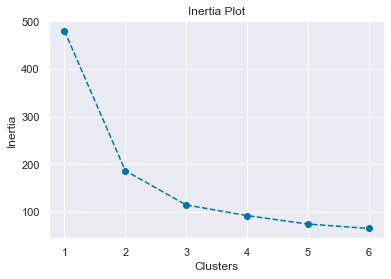

In [11]:
# Create cluster list
clusters = range(1,7)
inertia = []
for cluster in clusters:
    model_tester = KMeans(n_clusters = cluster)
    model_tester.fit(train_set_scaled)
    inertia.append(model_tester.inertia_)
    
    
# Creating the Cluster Plot
plt.plot(clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()

**Note**
* The inertia started reducing slowly at 3
* Hence three is the best value

# Model Fitting

In [12]:
# Instantiate KMeans as model
model = KMeans(n_clusters=3)
model.fit(train_set_scaled)
label_pred = model.predict(train_set_scaled)
# Creating a DataFrame of the predicted Label against the actual label
label_df = pd.DataFrame({'Label':label_pred, 'Species':train_label})
label_df.head()

,Label,Species
130,1,Iris-virginica
119,0,Iris-virginica
29,2,Iris-setosa
0,2,Iris-setosa
62,0,Iris-versicolor


# Checking model prediction on Train set

In [13]:
pd.crosstab(label_df['Label'], label_df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Label,,,
0,0,32,11
1,0,12,28
2,37,0,0


# Checking the model on the Test Set

In [14]:
test_set_scaled = preprocessing_pipeline.transform(test_set)
test_pred = model.predict(test_set_scaled)
test_label_df = pd.DataFrame({'Label':test_pred, 'Species':test_label})
pd.crosstab(test_label_df['Label'], test_label_df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Label,,,
0,0,6,3
1,0,0,8
2,13,0,0


**Note**
* The model is pretty decent and it predicted the test data very well

# Visualizing the Cluster

* Since the data is 4 dimensional, We will TSNE from Scikit learn to turn it to 2 dimension that can be plotted

C:\Users\SHEHU ALABA RASHEED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


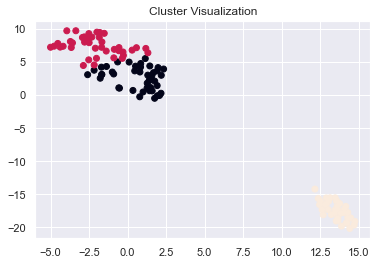

In [17]:
# Instantiate TSNE as transformer
transformer = TSNE(learning_rate=100)
train_transformed = transformer.fit_transform(train_set_scaled)
xs = train_transformed[:, 0]
ys = train_transformed[:, 1]
plt.scatter(xs, ys, c=label_pred)
plt.title('Cluster Visualization')
plt.show()

**Note**
* We can clearly see that based on all data we have three clear clusters

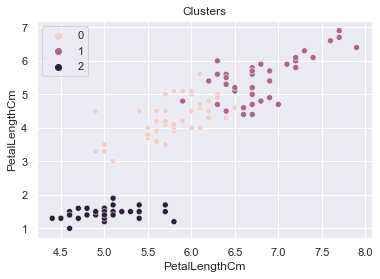

In [19]:
# Checking the cluster based on SepalLengthCm and PetalLengthCm
sns.scatterplot(data= train_set, x='SepalLengthCm', y='PetalLengthCm', hue=label_pred)
plt.ylabel('PetalLengthCm')
plt.xlabel('PetalLengthCm')
plt.title('Clusters')
plt.show()